In [1]:
import pandas as pd

In [7]:
import os

total_len = 0
ids = set()

found = False
for csv in os.listdir("../data/lostart"):
    df = pd.read_csv(f"../data/lostart/{csv}", sep=";")
    total_len += len(df)
    print(f"{csv}: {len(df)}")

    assert df["Lost Art ID"].dtype == "int64", f"Lost Art ID is not int64 in {csv}"
    
    df_ids = df["Lost Art ID"].unique()

    for id in df_ids:
        if id == 310418:
            found = True
            print(f"Found ID: {id}")
        if id in ids:
            print(f"Duplicate ID: {id}")
        else:
            ids.add(id)

print(f"Total: {total_len}")
print(f"Unique IDs: {len(ids)}")
print(f"Found ID: {found}")

lostart_start=6500.csv: 500
lostart_start=2000.csv: 500
lostart_start=20000.csv: 500
lostart_start=24500.csv: 500
lostart_start=36500.csv: 500
lostart_start=32000.csv: 500
lostart_start=28500.csv: 500
lostart_start=12500.csv: 500
lostart_start=16000.csv: 500
lostart_start=34500.csv: 500
lostart_start=30000.csv: 500
lostart_start=22000.csv: 500
lostart_start=26500.csv: 500
lostart_start=10500.csv: 500
lostart_start=14000.csv: 500
lostart_start=18000.csv: 500
lostart_start=4500.csv: 500
lostart_start=8500.csv: 500
lostart_start=18500.csv: 500
lostart_start=500.csv: 500
lostart_start=14500.csv: 500
lostart_start=10000.csv: 500
lostart_start=38000.csv: 497
lostart_start=26000.csv: 500
lostart_start=22500.csv: 500
lostart_start=30500.csv: 500
lostart_start=34000.csv: 500
lostart_start=8000.csv: 500
lostart_start=4000.csv: 500
lostart_start=2500.csv: 500
lostart_start=6000.csv: 500
lostart_start=16500.csv: 500
lostart_start=12000.csv: 500
lostart_start=32500.csv: 500
lostart_start=36000.csv:

# Lost art Dataset

Dataset of search notices for spoliated works.

In [8]:
df_lostart = pd.read_csv("../data/lostart/lostart_start=0.csv", sep=";")

In [9]:
print(df_lostart.columns)

# Meldungsart: Type de message                                  #### TO DELETE ####
# Datensatzart: Type d'enregistrement                           #### TO DELETE ####
# Lost Art ID: ID Lost Art                                      #### TO DELETE ####
# Hersteller/Künstler/Autor:in: Producteur/artiste/auteur:in
# Titel: Titre
# Datierung: Datation
# Objektart: Type d'objet
# Inventarnummer/Signatur: Numéro d'inventaire/signature        #### TO DELETE ####
# Beschreibung: Description
# Provenienz: Provenance                                        #### TO DELETE ####
# Veröffentlicht seit: Publié depuis                            #### TO DELETE ####
# Kontakt: Contact                                              #### TO DELETE ####
# Link: Lien                                                    #### TO DELETE ####
# Literatur/Quelle: Littérature / source                        #### TO DELETE ####

Index(['Meldungsart', 'Datensatzart', 'Lost Art ID',
       'Hersteller/Künstler/Autor:in', 'Titel', 'Datierung', 'Objektart',
       'Inventarnummer/Signatur', 'Beschreibung', 'Provenienz',
       'Veröffentlicht seit', 'Kontakt', 'Link', 'Literatur / Quelle'],
      dtype='object')


In [10]:
# Missing values
print(df_lostart.isnull().sum())

Meldungsart                       0
Datensatzart                      0
Lost Art ID                       0
Hersteller/Künstler/Autor:in      0
Titel                             0
Datierung                       104
Objektart                         0
Inventarnummer/Signatur         155
Beschreibung                     63
Provenienz                        4
Veröffentlicht seit               0
Kontakt                          30
Link                              0
Literatur / Quelle              321
dtype: int64


In [11]:
# Fundmeldung: Annonce de la découverte
# Suchmeldung: Avis de recherche

print(df_lostart["Meldungsart"].value_counts())

Meldungsart
Fundmeldung    263
Suchmeldung    237
Name: count, dtype: int64


Missing description: 63 / 500 (12.60%)
Total missing description: 12019 / 38497 (31.22%)


<Axes: >

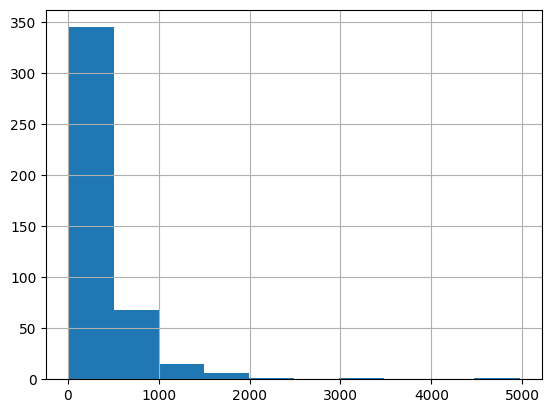

In [15]:
# Missing description
print("Missing description:", df_lostart["Beschreibung"].isnull().sum(), "/", len(df_lostart), f"({df_lostart['Beschreibung'].isnull().sum() / len(df_lostart) * 100:.2f}%)")

# Total missing description in all CSVs

total_missing = 0
for csv in os.listdir("../data/lostart"):
    df = pd.read_csv(f"../data/lostart/{csv}", sep=";")
    total_missing += df["Beschreibung"].isnull().sum()
print("Total missing description:", total_missing, "/", total_len, f"({total_missing / total_len * 100:.2f}%)")

# Plot description sizes
df_lostart["Beschreibung"].str.len().hist()

# Rose Valland DataBase (POP)

MNR Rose Valland database, which contains spoliated works returned to France.

In [11]:
pop = pd.read_excel("../data/mnr_20250303_17h40m54s.ods")
pop.head()

,REF,POP_COMMENTAIRES,POP_FLAGS,POP_IMPORT,AATT,AFFE,ATIT,ATTR,AUTI,AUTR,...,REPR,RESUME,SALLES,SCLE,SREP,STYL,SUITE,TECH,TITR,VIDEO
0,MNR00329,NaN,NaN,6319fd4a4e2f920b275837a5;6319fd4a4e2f920b27583...,NaN,Paris ; musée du Louvre ; département des Pein...,Saint Jérôme ; Saint Antoine,NaN,NaN,RIBERA Jusepe de (d'après),...,"figure (saint Jérôme, pénitence, crâne, nudité)",NaN,NaN,17e siècle,NaN,NaN,NaN,Toile;peinture à l'huile,Saint Jérôme pénitent,mnr/MNR00329/MNR329-copyright-RMN-Grand_Palais...
1,MNR00330,NaN,NaN,6319fd4a4e2f920b275837a5;6319fd4a4e2f920b27583...,NaN,Paris ; musée du Louvre ; département des Pein...,Bethléem,NaN,NaN,COLLANTES Francisco,...,"scène biblique (Sainte Famille, arrivée, Bethl...",NaN,NaN,17e siècle,Bible : Nouveau Testament,NaN,NaN,Toile;peinture à l'huile,Arrivée à Bethléem,mnr/MNR00330/MNR330_CopyrightRMN-GP_Franck-Rau...
2,MNR00331,NaN,NaN,6319fd4a4e2f920b275837a5;6319fd4a4e2f920b27583...,NaN,Paris ; musée du Louvre ; département des Pein...,Les Beautés au balcon#Les Belles au balcon,NaN,NaN,"LUCAS Y VELAZQUEZ, Eugenio (autrefois LUCAS Y ...",...,"scène (homme : assis, femme : assis, espagnol,...",NaN,12/09/2019 : oui,19e siècle,NaN,NaN,NaN,Toile;peinture à l'huile,Hommes et femmes espagnols à une tribune,mnr/MNR00331/MNR331_copyright-MuseeduLouvre_1....
3,MNR00332,NaN,NaN,6319fd4a4e2f920b275837a5;6319fd4a4e2f920b27583...,NaN,Paris ; musée du Louvre ; département des Pein...,Évêque avec sainte Agnès#Composition religieus...,VALDES Léal ; SHUT Cornelis.,NaN,THULDEN Théodore van ? Anonyme,...,"figures (saint François d'Assise, saint August...",NaN,"25/09/2019 : non, mais sera exposé après rénov...",17e siècle,NaN,NaN,NaN,Toile;peinture à l'huile,"Religieuse avec saint Augustin, sainte Agnès e...",mnr/MNR00332/MNR332-copyright-Musee_Goya_Castr...
4,MNR00333,NaN,NaN,6319fd4a4e2f920b275837a5;6319fd4a4e2f920b27583...,NaN,Paris ; musée du Louvre ; département des Pein...,Portrait d'homme puis Portrait d'un écrivain,"RAEBURN, Sir Henry",NaN,REYNOLDS Sir Joshua,...,"portrait (Chambers William, homme, en buste, d...",NaN,NaN,18e siècle,NaN,NaN,NaN,Bois;peinture à l'huile,Portrait de Sir William Chambers (1723-1796),mnr/MNR00333/MNR333-copyright_Musees_de_la_vil...


In [73]:
print(pop.columns)

Index(['REF', 'POP_COMMENTAIRES', 'POP_FLAGS', 'POP_IMPORT', 'AATT', 'AFFE',
       'ATIT', 'ATTR', 'AUTI', 'AUTR', 'BASE', 'BIBL', 'CARTELS', 'CATE',
       'COMM', 'CONTIENT_IMAGE', 'DENO', 'DESC', 'DIMS', 'DMAJ', 'DMIS',
       'DOMN', 'DREP', 'ECOL', 'ETAT', 'EXPO', 'GENE', 'HIST', 'HIST2',
       'HIST3', 'HIST4', 'HISTORIQUE', 'INSC', 'INV', 'LOCA', 'MARQ', 'MILL',
       'NET', 'NOTE', 'NOTE2', 'NUMS', 'OBSE', 'PAUT', 'PHOT', 'PREP',
       'PRODUCTEUR', 'PROV', 'PTIT', 'RCL', 'REDC', 'REFIM', 'RENV', 'REPR',
       'RESUME', 'SALLES', 'SCLE', 'SREP', 'STYL', 'SUITE', 'TECH', 'TITR',
       'VIDEO'],
      dtype='object')


In [74]:
pd.set_option('display.max_rows', 100)

print(pop.isnull().sum())

REF                    0
POP_COMMENTAIRES    2456
POP_FLAGS           2456
POP_IMPORT             0
AATT                2292
AFFE                 425
ATIT                1434
ATTR                1953
AUTI                2382
AUTR                  60
BASE                   0
BIBL                1172
CARTELS             2157
CATE                 247
COMM                  17
CONTIENT_IMAGE         0
DENO                2190
DESC                1350
DIMS                 123
DMAJ                   0
DMIS                2205
DOMN                  16
DREP                2436
ECOL                 450
ETAT                1870
EXPO                1291
GENE                2184
HIST                 245
HIST2               2452
HIST3                  5
HIST4               2265
HISTORIQUE             0
INSC                1672
INV                  246
LOCA                 202
MARQ                 876
MILL                1795
NET                 2071
NOTE                 307
NOTE2                246


Missing description:  1350 / 2456 (54.97%)
Missing image:  59 / 2456 (2.40%)


<Axes: >

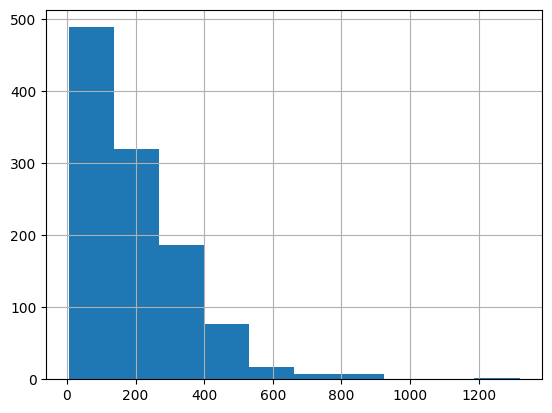

In [11]:
# Missing description
print("Missing description: ", pop["DESC"].isnull().sum(), "/", len(pop), f"({(pop["DESC"].isnull().sum() / len(pop) * 100):.2f}%)")

# Missing image
print("Missing image: ", len(pop[pop["CONTIENT_IMAGE"] == "non"]), "/", len(pop), f"({len(pop[pop['CONTIENT_IMAGE'] == 'non']) / len(pop) * 100:.2f}%)")

# Description sizes
pop["DESC"].str.len().hist()

In [12]:
print(pop["CATE"].value_counts())

CATE
Oeuvre dont l'historique est incomplet entre 1933 et 1945, en l'état des recherches actuelles.    1741
Oeuvre assurément spoliée.                                                                         158
Oeuvre assurément non spoliée.                                                                     119
Oeuvre probablement spoliée, en l'état des recherches actuelles.                                    70
Oeuvre assurément spoliée, propriétaire inconnu en l’état des recherches actuelles.                 65
Oeuvre probablement non spoliée, en l'état des recherches actuelles.                                51
Oeuvre assurément non spoliée, en l'état des recherches actuelles.                                   2
Oeuvre probablement non spoliée.                                                                     1
Oeuvre dont l'historique est incomplet entre 1933 et 1945, en l'état des recherches actuelles        1
Œuvre probablement non spoliée, en l’état des recherches actuelles. 